# Working with tabular data in Python

In [1]:
# First we want to import the libraries/modules we will use in this document.
# Each of these represents a set of pre-written functions that makes working with data easier.
# NumPy provides numerical data processing utilities
import numpy as np 
# Pandas gives us better ways of working with tables
import pandas as pd
# SciPy gives us access to statistical tests
import scipy as sci

# Seaborn is a great plotting library but isn't installed by default
# This lets us install seaborn into jupyter
%pip install seaborn
# Now we can import it just like the others
import seaborn as sns

Let's take a moment to see how we can load data into Jupyter Lab for use in notebooks like this one.
It is as easy as dragging and dropping the file you wish to load into the panel on the left. However, first navigate to the data directory by clicking on the folder icon under the search bar and then clicking the folder called data. There you should see a few pre-loaded datasets. We could use those exisitng files for a demonstration but eventually you will want to use the data that you collect. Now we can open the File Explorer (Finder on Mac), navigate to the data we wish to import, and simply drag it from the File Explorer into the sidebar. You may see a plus symbol as you drag the file over. Now you should see that the data you dragged over is listed in the sidebar. That means it is ready for us to use in the next step. You can also right-click on a file to perform other operations in the sidebar like renaming, copying, deleting, etc.

In [2]:
# Using pandas we can read our csv and assign it to a variable for use later
# ::::::::::::: NOTE :::::::::::::
# After completing the data import step described above, make sure the path below matches the name
# of your file and then un-comment the next line by removing the # 

# od1 = pd.read_csv('/drive/data/oceanos_data1.csv')

In [3]:
# Pandas has an implicit print feature that is useful for quickly looking at your data
od1

,file,timestamp,manta,latitude,longitude,annotation,pH_units,HDO_%Sat,HDO_mg/l,Temp_deg_C,...,Chl_ug/l,PAR_uMol,CDOM_ppb,SpCond_uS/cm,SpCond_mS/cm,Turb2_FNU,pH_mV,Depth_ft,Depth_m,Int_Batt_V
0,Biobay,6/22/2023 8:35,MT08214956,17.971665,-67.014499,NaN,8.08,102.1,6.04,30.28,...,0.55,-6.6,15.71,57540,57.54,1.41,NaN,NaN,NaN,NaN
1,Biobay,6/22/2023 8:35,MT08214956,17.971666,-67.014501,NaN,8.08,102.1,6.04,30.29,...,0.53,-7.1,15.73,57520,57.52,1.43,NaN,NaN,NaN,NaN
2,Biobay,6/22/2023 8:35,MT08214956,17.971676,-67.014502,NaN,8.08,101.8,6.02,30.29,...,0.54,-2.6,15.74,57490,57.49,1.36,NaN,NaN,NaN,NaN
3,Biobay,6/22/2023 8:35,MT08214956,17.971679,-67.014505,NaN,8.08,101.6,6.01,30.29,...,0.57,-8.0,15.75,57520,57.52,1.30,NaN,NaN,NaN,NaN
4,Biobay,6/22/2023 8:35,MT08214956,17.971692,-67.014505,NaN,8.08,101.6,6.01,30.28,...,0.61,-7.4,15.76,57600,57.60,1.43,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,Isla Cueva,6/22/2023 11:01,MT08214956,17.965011,-67.076180,NaN,8.01,76.3,4.55,29.99,...,0.32,-6.6,14.54,56640,56.64,1.30,NaN,NaN,NaN,NaN
1482,Isla Cueva,6/22/2023 11:01,MT08214956,17.965011,-67.076180,NaN,8.02,76.3,4.55,29.99,...,0.33,-8.8,14.53,56640,56.64,1.26,NaN,NaN,NaN,NaN
1483,Isla Cueva,6/22/2023 11:01,MT08214956,17.965011,-67.076180,NaN,8.01,76.3,4.55,29.99,...,0.27,-7.8,14.51,56650,56.65,1.44,NaN,NaN,NaN,NaN
1484,Isla Cueva,6/22/2023 11:01,MT08214956,17.965011,-67.076180,NaN,8.01,76.3,4.55,29.99,...,0.26,-11.2,14.56,56690,56.69,1.41,NaN,NaN,NaN,NaN


## Visual Analysis

With that (hopefully) painless data ingest step out of the way, we can move on immediately to working with our data and making graphs. One of the most beautiful things about doing analysis in code is that we can very quickly get a sense of what our data looks like, which helps us ask the right questions later.

In [4]:
# We can see that we have observations for multiple locations so we will want to group those by name.
# Here that column is called "file" but don't let that confuse you.
od1_grouped = od1.groupby('file')

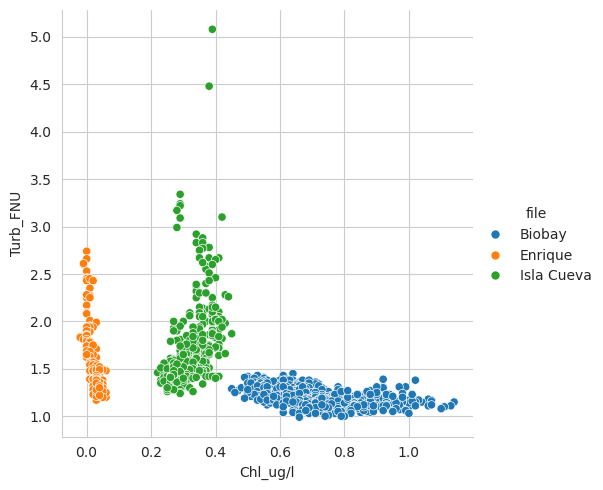

In [6]:
# Seaborn comes with some clean default plot styles we can choose from. Set one here.
sns.set_style('whitegrid')

# We can plot the relationship between variables with relplot
sns.relplot(
    data=od1,
    x="Chl_ug/l", y="Turb_FNU", hue="file"
)

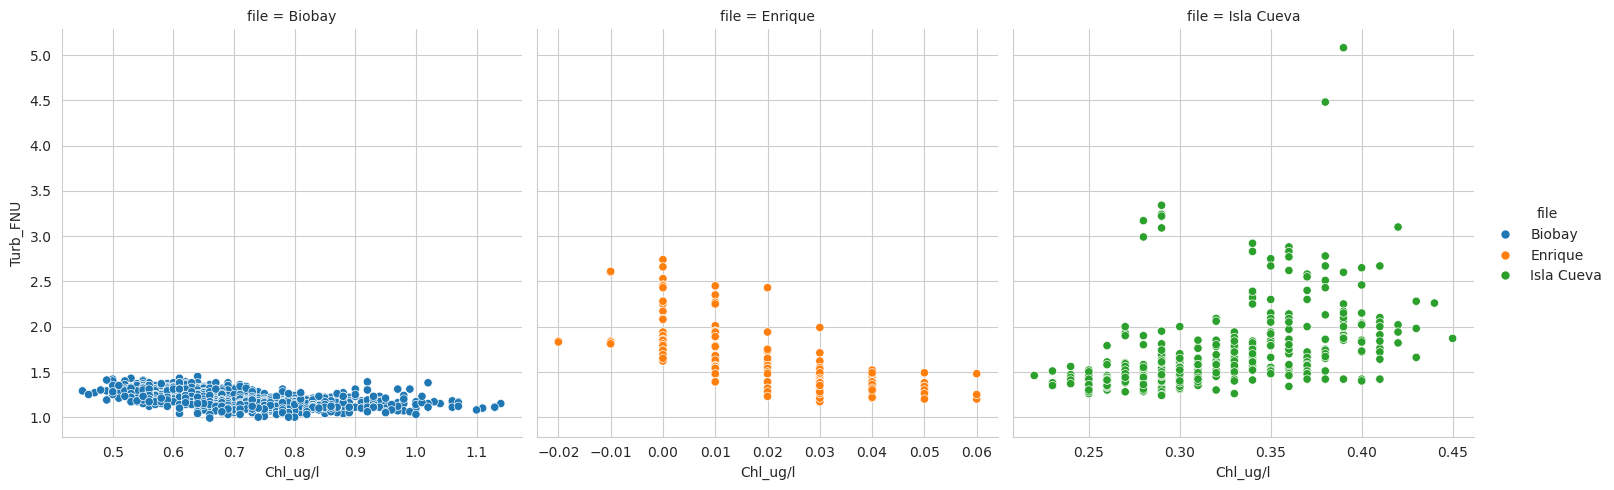

In [47]:
# If we want separate graphs for each group we can add the "col" (column) argument
sns.relplot(
    data=od1,
    x="Chl_ug/l", y="Turb_FNU", hue="file", col='file',
    facet_kws=dict(sharex=False) # Set this to True to make all graphs share the same x-axis scale and limits
)

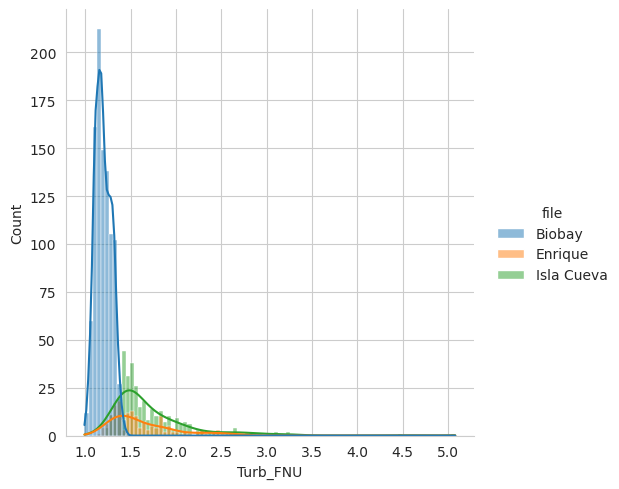

In [7]:
# We may be interested in some quantities that aren't as distinctly different at each location.
# For this we can look at the distribution of one variable at a time, still divided by location.
sns.displot(data=od1, x="Turb_FNU", hue="file", kde=True)

We can see a lot of overlap in the distribution of our data, but one of those curves looks distinctly different than the others. Hold onto that thought and we will explore how to quantify the differences shortly.

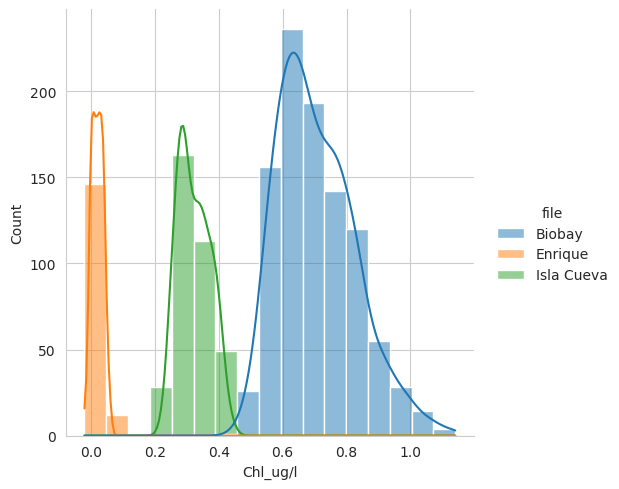

In [8]:
# Let's check a variable that is visually distinct between locations.
sns.displot(data=od1, x="Chl_ug/l", hue="file", kde=True)

## Descriptive Statistics

You will have noticed that the graphs above show differences in the means of the variables as well as differences in how the data are spread out around the mean. Those differences are two of the most important statistics for understanding the distribution of our data. Let's learn how to quantify them both.

### Standard Deviation

Standard deviation is the parameter that describes the variation - or deviation - in observations about the mean. A smaller standard deviation indicates more of the observations are close to the mean. A large standard deviation indicates that there is more variability in where the observations fall relative to the mean. This is the spread of the curves we see in the graphs above.

When looking at many samples from a single location, the standard deviation is an estimation of how variable the conditions are. Also note that in the case of many repeated observations of the same conditions, the standard deviation is the precision of the measurements.

We can get a table showing the standard deviation of all numeric variables in our dataset like this:

In [9]:
# Group by the site name, and then get the standard deviation of numeric columns
od1_sd = od1.groupby('file').agg(lambda x: np.std(x) if x.dtype == 'float64' or x.dtype == 'int64' else None)
od1_sd

,timestamp,manta,latitude,longitude,annotation,pH_units,HDO_%Sat,HDO_mg/l,Temp_deg_C,Salinity_PSU,...,Chl_ug/l,PAR_uMol,CDOM_ppb,SpCond_uS/cm,SpCond_mS/cm,Turb2_FNU,pH_mV,Depth_ft,Depth_m,Int_Batt_V
file,,,,,,,,,,,,,,,,,,,,,
Biobay,None,None,0.000047,0.000013,NaN,0.012652,0.680760,0.041556,0.006047,0.297623,...,0.121701,1.767797,0.070629,395.695017,0.395695,0.087295,NaN,NaN,NaN,NaN
Enrique,None,None,0.000010,0.000005,NaN,0.004571,0.405927,0.026426,0.006723,0.399293,...,0.017579,1.794422,0.063306,532.059212,0.532059,0.353662,NaN,NaN,NaN,NaN
Isla Cueva,None,None,0.000019,0.000010,NaN,0.019756,4.973031,0.297233,0.018469,0.190308,...,0.049874,1.694982,0.073332,253.344279,0.253353,0.460385,NaN,NaN,NaN,NaN


In [10]:
# Rather than the whole table, it is often more helpful to look at one variable at a time.
od1_sd['Temp_deg_C']

file
Biobay        0.006047
Enrique       0.006723
Isla Cueva    0.018469
Name: Temp_deg_C, dtype: float64

In [12]:
# It is even possible to get more than one variable at a time using double brackets.
od1_sd[['PAR_uMol', 'pH_units']]

,PAR_uMol,pH_units
file,,
Biobay,1.767797,0.012652
Enrique,1.794422,0.004571
Isla Cueva,1.694982,0.019756


As a general guideline we can say that the standard deviations are similar enough to do statistical comparisons when the smallest standard deviation is no less than half of the largest. Here we see that PAR_uMol passes that test whereas pH_units does not. More about statistical tests for comparing groups is included as a bonus at the end of this document for those who are curious.

### Measures of Central Tendency 

Measures of central tendency are a group of numbers that describe the characteristics of the center of our data distributions. These are typically the **mean**, **median**, and **mode**. For most practical applications we are mostly interested in the mean of the data. The mean tells us where our distribution is centered and, combined with the standard deviaton, gives us the most fundamental properties of our distribution.

NOTE: The numbers we get for mean and standard deviation are only estimates of the true values. If two groups sample the same locations, their numbers might be slightly different. Increaseing the number of samples further refines the estimates until they become arbitrarily close to the true values.

Just as we did with the standard deviation above, we can get the mean of our numeric variables grouped by location.

In [13]:
# Note that the only thing we've had to change is the variable name on the left and the
# function we are using to aggregate our data. Now it is np.mean instead of np.std.
od1_u = od1.groupby('file').agg(lambda x: np.mean(x) if x.dtype == 'float64' or x.dtype == 'int64' else None)
od1_u

,timestamp,manta,latitude,longitude,annotation,pH_units,HDO_%Sat,HDO_mg/l,Temp_deg_C,Salinity_PSU,...,Chl_ug/l,PAR_uMol,CDOM_ppb,SpCond_uS/cm,SpCond_mS/cm,Turb2_FNU,pH_mV,Depth_ft,Depth_m,Int_Batt_V
file,,,,,,,,,,,,,,,,,,,,,
Biobay,None,None,17.971701,-67.014495,NaN,8.122082,98.801128,5.843621,30.280595,38.196103,...,0.706462,-6.263590,15.458369,57559.528205,57.559528,1.197405,NaN,NaN,NaN,NaN
Enrique,None,None,17.956554,-67.051613,NaN,8.142975,108.751266,6.505253,29.873038,37.317848,...,0.020696,-17.854430,15.307911,56368.734177,56.368734,1.626076,NaN,NaN,NaN,NaN
Isla Cueva,None,None,17.965023,-67.076173,NaN,7.979717,72.508499,4.320708,30.006516,37.602918,...,0.322011,-9.018697,14.430142,56756.203966,56.756232,1.717620,NaN,NaN,NaN,NaN


In [56]:
# And as with the standard deviation, we can isolate one or more variables by name.
od1_u[['Temp_deg_C', 'Chl_ug/l', 'CDOM_ppb']]

,Temp_deg_C,Chl_ug/l,CDOM_ppb
file,,,
Biobay,30.280595,0.706462,15.458369
Enrique,29.873038,0.020696,15.307911
Isla Cueva,30.006516,0.322011,14.430142


### Interpretation

Now that we have the mean and standard deviation, we can look at them together to get information about our data.

In [14]:
# concat joins the two columns we selected
pd.concat([od1_sd['CDOM_ppb'], od1_u['CDOM_ppb']],
          join='inner',
          keys=['SD', 'MEAN'],
          axis=1)

,SD,MEAN
file,,
Biobay,0.070629,15.458369
Enrique,0.063306,15.307911
Isla Cueva,0.073332,14.430142


From this we can see that Biobay and Enrique have very similar means and should see that the peak of the distributions are close together for these two. Isla Cueva is somewhat lower in CDOM on average. In fact, Isla Cueva is many standard deviations away from the other two, so the tails of the distributions should not touch.

An interesting side effect of this relationship is that if we were given a reading of CDOM, it would be easy to reasonably guess if it belonged to Isla Cueva or one of the others since we expect no overlap in their distributions. To once again return to visual analysis, we can graph the distribution of CDOM for each location and double-check our interpretation.

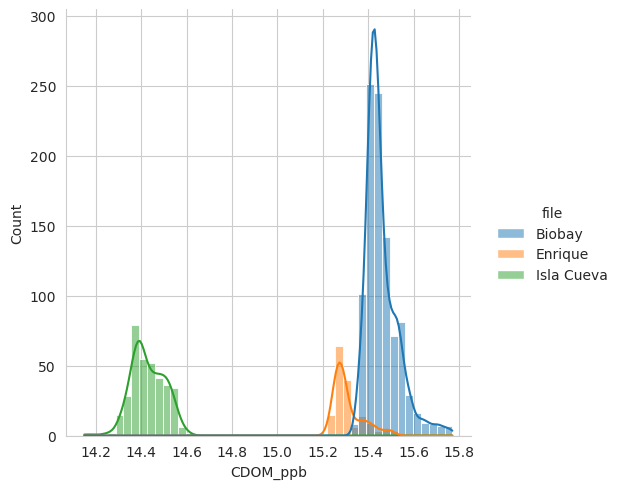

In [74]:
sns.displot(data=od1, x="CDOM_ppb", hue="file", kde=True)

And there we have it! We can see from our graph that by combining the mean and standard deviation we gained enough information to make some accurate statements about data we hadn't seen.

## Better Graphs for Better Understanding

There are a few things that we missed by only looking at the mean and standard deviation. Our denisty plots aren't smooth curves neatly centered on the mean. They have lumps and tails that we couldn't have expected from looking at the mean and standard deviation alone. In statistics language we would call these properties the modality and skewness. A detailed discussion of modality and skewness is more than we need to get into here, but we can look at two final plots which allow you to visualize some of these extra properties of your data.

### Box Plot

First we can look at a box plot. These take a different approach to showing the distribution of our data. Instead of focusing on the mean and standard deviation, these use the median and something called the interquartile range (IQR). What is most important is that these plots clearly show us which values are outside of the expected range of the data if it were not skewed.

You can see in the plot below that the distributions for Biobay and Enrique have quite a few observations that are higher than we'd expect to find, so we say that they are right-skewed. This could represent an issue with our data collection or - more likely - a physical reality of the data. Consider water temperature in a temperate climate. We might expect that the data are right-skewed because water can only get so cold before it is frozen and we can't take any measurements, and we'd expect the median temperature to remain closer to freezing than to boiling.

<AxesSubplot:xlabel='CDOM_ppb'>

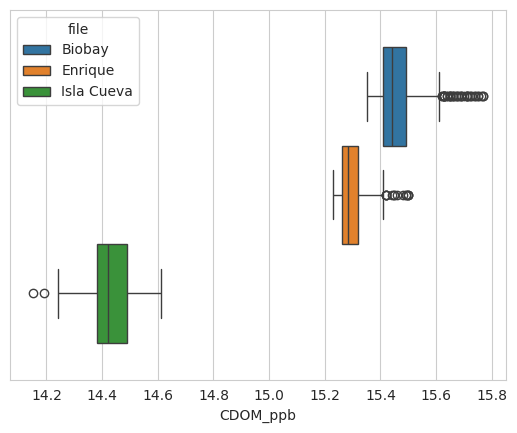

In [15]:
# This is a box plot. Or a box-and-whisker plot.
sns.boxplot(data=od1, x="CDOM_ppb", hue="file")

### Violin Plots
We might also be interested in overlaying those distribution curves that we've had in other graphs. Since a box plot is essentially a summary of the distribution of a single variable, we can combine them with the distribution to create a violin plot.

<AxesSubplot:xlabel='CDOM_ppb'>

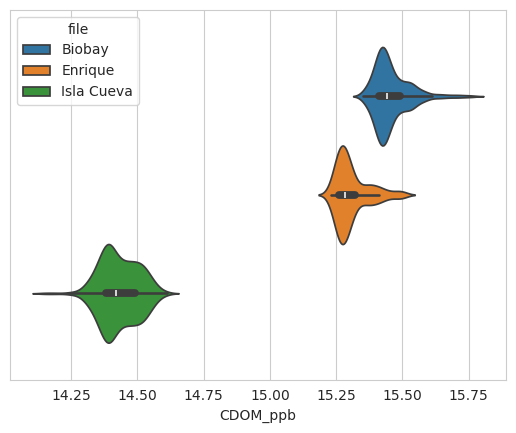

In [81]:
sns.violinplot(data=od1, x="CDOM_ppb", hue="file")

Here we can see similar info to what we had in the box plots, but with the added bonus that we can see the entire distribution more clearly than in our original distribution plots. By moving our tails away from the x-axis we can see the exact maximum and minimum for each group.

# BONUS STATS!

This is some extra information based on things I was thinking about while writing the workshop. You may find it useful, but some of it is beyond the scope of what I wanted to get into.

## Statistical Tests for Comparing Groups

In many cases you will want to know how observations belonging to different groups are similar or different. In more formal language, you are interested in how a categorical variable relates to a continuous variable. We can look at the mean and standard deviations to begin to answer that question, but sometimes we really want to quantify the relationships between groups. For that there are a number of tests that we could run, each with different assumptions and explanatory power. To keep things simple, we are going to only going to cover a few of the common ones in this section.

In [10]:
# Here we can split the data by each location and isolate the variable PAR_uMol.
# We also use dropna to remove any missing values since we can't use them in the test.
biobay = od1.where(od1.file=='Biobay')['PAR_uMol'].dropna()

In [11]:
enrique = od1.where(od1.file=='Enrique')['PAR_uMol'].dropna()

In [12]:
islacueva = od1.where(od1.file=='Isla Cueva')['PAR_uMol'].dropna()

In [13]:
# The test we are about to use assumes that the standard deviations are approximately the same as discussed
# previously AND that the distributions are approximately normal.
print(np.std(biobay))
print(np.std(enrique))
print(np.std(islacueva))

1.7677966688674658
1.79442155754039
1.6949822636612653


In [23]:
# Note that the above is equivalent to the following view of our standard deviation table,
# but splitting the data by location makes it easier to see what the code is doing.
od1_sd['PAR_uMol']

file
Biobay        1.767797
Enrique       1.794422
Isla Cueva    1.694982
Name: PAR_uMol, dtype: float64

### ANOVA

ANOVA stands for "**AN**alysis **O**f **VA**riance" and its main function is to determine if there is a statistically significant difference in the means of groups of observations. We begin by assuming that the means of the populations are the same. This initial assumption is our null hypothesis.

In [24]:
# One-way ANOVA
anova_result = sci.stats.f_oneway(biobay, enrique, islacueva)

In [25]:
# If we couldn't use ANOVA we could try the Kruskal-Wallis test.
# This one does *not* assume the standard deviations are similar.
kw_result = sci.stats.kruskal(biobay, enrique, islacueva)

In [26]:
# Now to look at the results.
print('ANOVA: ' + str(anova_result))
print('Kruskal: ' + str(kw_result))

ANOVA: F_onewayResult(statistic=3020.55515450114, pvalue=0.0)
Kruskal: KruskalResult(statistic=758.4282542164158, pvalue=2.0389056866404374e-165)


### Interpretation

In both tests we see that the p-values are close to 0 which means that we reject the null hypothesis that there is no difference between the means of these groups.

In our case, failing to reject the null hypothesis would have meant that we didn't find any significant difference in the means of the observations of PAR_uMol between our three locations. Critically, this does not imply that they ARE the same, but only that we failed to prove that they were NOT the same.

### Assumptions of Normality

As stated in the section "Measures Of Central Tendency," the mean and standard deviation give us most of the information we need about a distribution. While that is partially true, it does assume that our distribution is also sufficiently close to normal. 

The following is the Shapiro-Wilk test of normality. Our null hypothesis here is that the distribution is normal. A low p-value (p<0.5 in most cases) indicates that the distribution is not normal. Larger p-values (therefore failing to reject the null hypothesis) indicates that the distribution is probably sufficiently close to normal.

In [43]:
# od1_shapiro = od1.groupby('file').agg(lambda x: sci.stats.shapiro(x) if x.dtype == 'float64' or x.dtype == 'int64' else None)
# od1_shapiro['PAR_uMol']

file
Biobay        (0.9973090291023254, 0.10537305474281311)
Enrique       (0.9904622435569763, 0.36762920022010803)
Isla Cueva      (0.995379626750946, 0.3802298903465271)
Name: PAR_uMol, dtype: object